In [1]:
#importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import * 
%matplotlib inline

In [2]:
df= pd.read_csv("houseprices-1.csv")

In [3]:
df.head()

Price  LivingArea  Bathrooms  Bedrooms  LotSize  Age  Fireplace
0  142212        1982        1.0         3     2.00  133          0
1  134865        1676        1.5         3     0.38   14          1
2  118007        1694        2.0         3     0.96   15          1
3  138297        1800        1.0         2     0.48   49          1
4  129470        2088        1.0         3     1.84   29          1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1047 non-null   int64  
 1   LivingArea  1047 non-null   int64  
 2   Bathrooms   1047 non-null   float64
 3   Bedrooms    1047 non-null   int64  
 4   LotSize     1047 non-null   float64
 5   Age         1047 non-null   int64  
 6   Fireplace   1047 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 57.4 KB


In [4]:
df.describe(include='all')#desciption of statistical values in data

Price   LivingArea    Bathrooms     Bedrooms      LotSize  \
count    1047.000000  1047.000000  1047.000000  1047.000000  1047.000000   
mean   163862.125119  1807.302770     1.918338     3.183381     0.569580   
std     67651.558917   641.460916     0.641735     0.750265     0.777879   
min     16858.000000   672.000000     1.000000     1.000000     0.000000   
25%    112014.000000  1336.000000     1.500000     3.000000     0.210000   
50%    151917.000000  1672.000000     2.000000     3.000000     0.390000   
75%    205235.000000  2206.000000     2.500000     4.000000     0.600000   
max    446436.000000  4534.000000     4.500000     6.000000     9.000000   

               Age    Fireplace  
count  1047.000000  1047.000000  
mean     28.061127     0.593123  
std      34.900899     0.491486  
min       0.000000     0.000000  
25%       6.000000     0.000000  
50%      18.000000     1.000000  
75%      34.000000     1.000000  
max     247.000000     1.000000

<AxesSubplot:>

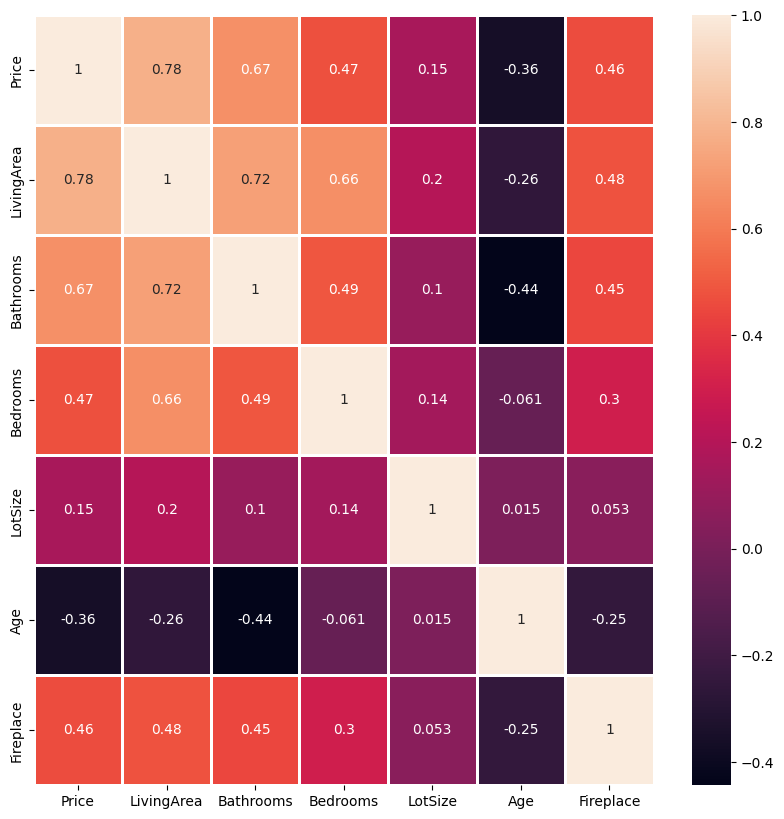

In [5]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(np.round(df.corr(),3),annot=True,linewidths=.9)

#Almost a perfect data to perform regression as price have +corr with every features and negative with age which is common.

# dealing with outliers

<AxesSubplot:>

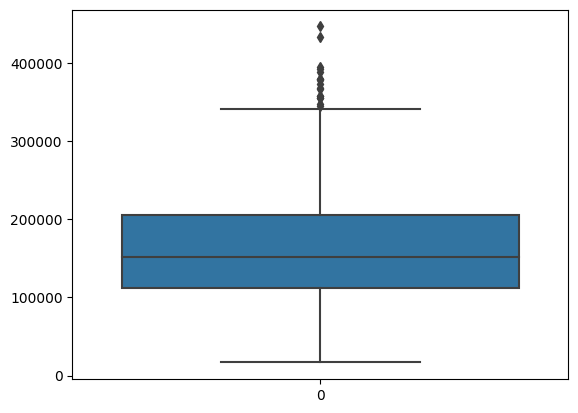

In [6]:
sns.boxplot(data=df["Price"])

In [24]:
df[df['Price']>=350000] #the values which are outliers in the price column

Price  LivingArea  Bathrooms  Bedrooms  LotSize  Age  Fireplace
134  387652        3504        2.5         5     0.90    0          1
237  368396        3358        3.5         4     0.58    9          1
253  379678        3720        4.0         5     0.80    0          1
288  391842        3003        3.5         4     0.46   88          1
359  355529        2186        2.5         3     1.40   12          0
367  446436        3467        2.5         4     0.34    3          1
392  378465        3457        2.5         3     1.00   20          1
395  357384        2322        2.5         3     0.27    0          1
430  373227        2058        1.5         2     0.23   49          1
473  394532        3361        3.5         4     0.71    1          1
509  366772        3200        2.5         4     1.27    1          1
632  357138        2618        1.5         3     1.92    1          1
722  432845        3250        2.5         3     0.53   23          1
869  354739        3982        4.5         4     5.61    6          1
930  379472        3440        4.0         5     0.77    1          1

<AxesSubplot:>

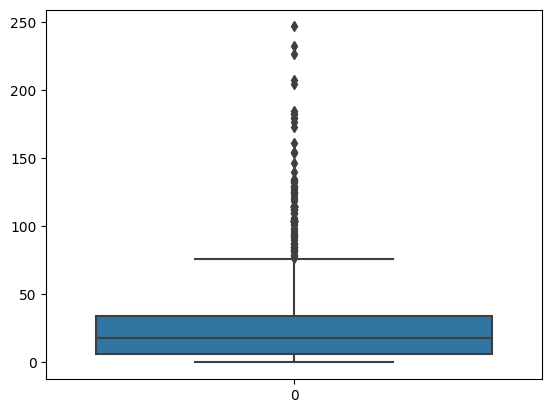

In [7]:
sns.boxplot(data=df["Age"])

In [29]:
df[df['Age']>200]

Price  LivingArea  Bathrooms  Bedrooms  LotSize  Age  Fireplace
65   226742        1989        2.0         3     1.00  247          1
91   185318        1500        1.5         4     0.58  208          1
102   59003        3285        2.0         5     0.42  233          0
851   75975        1300        2.0         3     0.49  227          1
919  139627        1980        1.0         4     7.16  205          0

<AxesSubplot:>

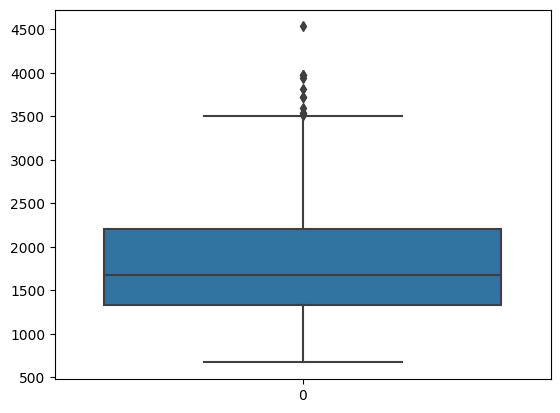

In [30]:
sns.boxplot(data=df['LivingArea'])

In [32]:
df[df["LivingArea"]>3600]

Price  LivingArea  Bathrooms  Bedrooms  LotSize  Age  Fireplace
136  260460        3726        2.5         4     2.31    3          1
216  294133        3981        3.0         4     0.69    0          1
253  379678        3720        4.0         5     0.80    0          1
776   88092        3944        1.0         4     1.64  185          1
799  295268        4534        2.5         6     5.08   15          1
869  354739        3982        4.5         4     5.61    6          1
956  347761        3820        4.5         4     1.40   18          1

<AxesSubplot:>

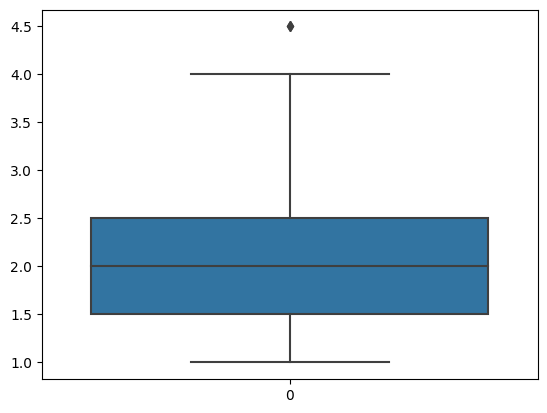

In [34]:
sns.boxplot(data=df["Bathrooms"])

In [40]:
df[df["Bathrooms"]>4]

Price  LivingArea  Bathrooms  Bedrooms  LotSize  Age  Fireplace
869  354739        3982        4.5         4     5.61    6          1
956  347761        3820        4.5         4     1.40   18          1

In [27]:
df[df["LotSize"]==0]

Price  LivingArea  Bathrooms  Bedrooms  LotSize  Age  Fireplace
175   76342         896        1.0         2      0.0   48          0
489  121279        1348        2.5         2      0.0   18          1
662  260887        2176        2.0         3      0.0   36          1

In [9]:
Q1 = df.quantile(0.25)  #25%
Q3 = df.quantile(0.75) #75%
IQR = Q3 - Q1        #50%

In [10]:
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] 
df_iqr.reset_index(inplace=True)

df_iqr.drop('index',axis=1, inplace=True)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] 

In [12]:
df_iqr.reset_index(inplace=True)

In [13]:
df_iqr

index   Price  LivingArea  Bathrooms  Bedrooms  LotSize  Age  Fireplace
0        1  134865        1676        1.5         3     0.38   14          1
1        2  118007        1694        2.0         3     0.96   15          1
2        3  138297        1800        1.0         2     0.48   49          1
3        5  206512        1456        2.0         3     0.98   10          0
4        6   50709         960        1.5         2     0.01   12          0
..     ...     ...         ...        ...       ...      ...  ...        ...
862   1040  182649        1758        2.5         3     0.27    1          1
863   1041  206480        2310        2.5         3     1.00   18          0
864   1042  107695        1802        2.0         4     0.97   56          1
865   1044  154829        1440        2.0         2     0.61   66          1
866   1045  179492        2030        2.5         3     1.00    3          1

[867 rows x 8 columns]

In [51]:
df_iqr.drop('index',axis=1, inplace=True)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<AxesSubplot:>

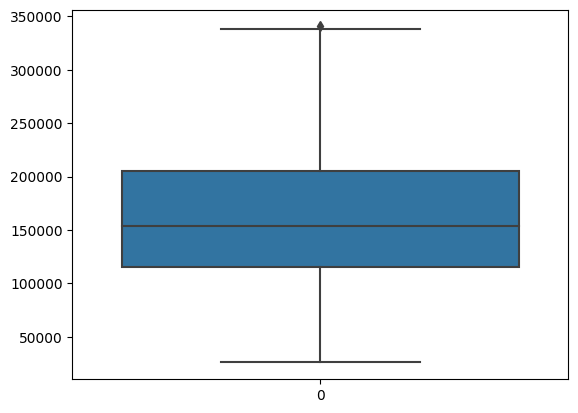

In [59]:
sns.boxplot(data=df_iqr["Price"])

<AxesSubplot:>

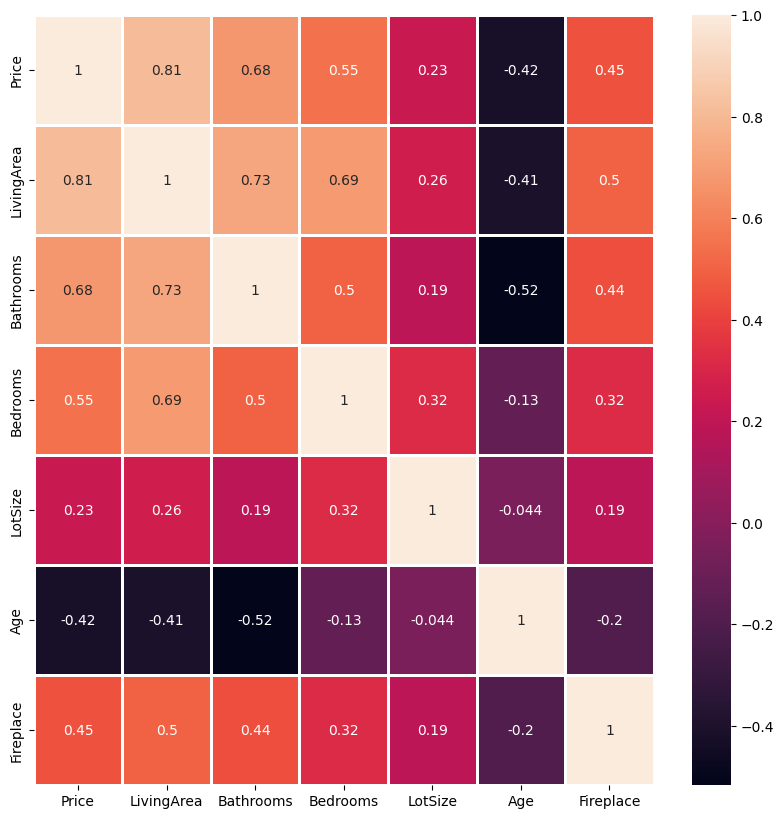

In [100]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(np.round(df_iqr.corr(),3),annot=True,linewidths=.9)

In [ ]:
#train test split

In [60]:
X=df_iqr.drop("Price",axis=1)

In [61]:
X

LivingArea  Bathrooms  Bedrooms  LotSize  Age  Fireplace
0          1676        1.5         3     0.38   14          1
1          1694        2.0         3     0.96   15          1
2          1800        1.0         2     0.48   49          1
3          1456        2.0         3     0.98   10          0
4           960        1.5         2     0.01   12          0
..          ...        ...       ...      ...  ...        ...
862        1758        2.5         3     0.27    1          1
863        2310        2.5         3     1.00   18          0
864        1802        2.0         4     0.97   56          1
865        1440        2.0         2     0.61   66          1
866        2030        2.5         3     1.00    3          1

[867 rows x 6 columns]

In [62]:
y=df_iqr["Price"]
y

0      134865
1      118007
2      138297
3      206512
4       50709
        ...  
862    182649
863    206480
864    107695
865    154829
866    179492
Name: Price, Length: 867, dtype: int64

In [63]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(650, 6)
(650,)
(217, 6)
(217,)


In [28]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
reg= DecisionTreeRegressor(criterion='mse',max_depth=5)

In [80]:
reg.fit(X_train,y_train)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=5)

In [90]:
from sklearn import tree
plt.figure(figsize=(150,80))
tree.plot_tree(reg,filled=True)

[Text(0.5225409836065574, 0.9166666666666666, 'X[0] <= 1904.0\nmse = 3486489454.918\nsamples = 650\nvalue = 162391.309'),
 Text(0.26229508196721313, 0.75, 'X[0] <= 1390.0\nmse = 1436057965.708\nsamples = 408\nvalue = 130535.446'),
 Text(0.13114754098360656, 0.5833333333333334, 'X[0] <= 1046.0\nmse = 836976263.45\nsamples = 189\nvalue = 110328.931'),
 Text(0.06557377049180328, 0.4166666666666667, 'X[0] <= 826.5\nmse = 621224010.559\nsamples = 64\nvalue = 94993.438'),
 Text(0.03278688524590164, 0.25, 'X[0] <= 783.5\nmse = 459397529.84\nsamples = 5\nvalue = 68510.6'),
 Text(0.01639344262295082, 0.08333333333333333, 'mse = 516630170.25\nsamples = 2\nvalue = 86903.5'),
 Text(0.04918032786885246, 0.08333333333333333, 'mse = 45354913.556\nsamples = 3\nvalue = 56248.667'),
 Text(0.09836065573770492, 0.25, 'X[0] <= 871.0\nmse = 570465548.495\nsamples = 59\nvalue = 97237.746'),
 Text(0.08196721311475409, 0.08333333333333333, 'mse = 1428394134.889\nsamples = 3\nvalue = 151592.667'),
 Text(0.11475

In [81]:
y_pred=reg.predict(X_test)

In [82]:
r2_score(y_test,y_pred)

0.6024529172200412

In [91]:
parameter={
    'criterion':['mse','mae'],
    'max_depth':[2,3,4,5,6,7,8,9,None],
}

In [92]:
grid=GridSearchCV(DecisionTreeRegressor(),param_grid=parameter)

In [93]:
grid.fit(X_train,y_train)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in vers

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, None]})

In [94]:
grid.best_score_

0.6440437012200037

In [95]:
grid.best_params_

{'criterion': 'mse', 'max_depth': 4}

In [101]:
reg= DecisionTreeRegressor(criterion='mse',max_depth=4)

In [102]:
reg.fit(X_train,y_train)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=4)

In [103]:
plt.figure(figsize=(150,80))
tree.plot_tree(reg,filled=True)

[Text(0.5, 0.9, 'X[0] <= 1904.0\nmse = 3486489454.918\nsamples = 650\nvalue = 162391.309'),
 Text(0.25, 0.7, 'X[0] <= 1390.0\nmse = 1436057965.708\nsamples = 408\nvalue = 130535.446'),
 Text(0.125, 0.5, 'X[0] <= 1046.0\nmse = 836976263.45\nsamples = 189\nvalue = 110328.931'),
 Text(0.0625, 0.3, 'X[0] <= 826.5\nmse = 621224010.559\nsamples = 64\nvalue = 94993.438'),
 Text(0.03125, 0.1, 'mse = 459397529.84\nsamples = 5\nvalue = 68510.6'),
 Text(0.09375, 0.1, 'mse = 570465548.495\nsamples = 59\nvalue = 97237.746'),
 Text(0.1875, 0.3, 'X[4] <= 61.5\nmse = 765380268.912\nsamples = 125\nvalue = 118180.704'),
 Text(0.15625, 0.1, 'mse = 558897677.203\nsamples = 118\nvalue = 115923.983'),
 Text(0.21875, 0.1, 'mse = 2713053258.245\nsamples = 7\nvalue = 156222.571'),
 Text(0.375, 0.5, 'X[4] <= 12.5\nmse = 1296601137.778\nsamples = 219\nvalue = 147973.945'),
 Text(0.3125, 0.3, 'X[3] <= 0.135\nmse = 973392891.32\nsamples = 64\nvalue = 167327.734'),
 Text(0.28125, 0.1, 'mse = 1200476363.556\nsamples

In [104]:
y_pred=reg.predict(X_test)

In [105]:
r2_score(y_test,y_pred)

0.6389861823331621

In [96]:
#Feature importance

In [97]:
for importance, name in sorted(zip(reg.feature_importances_,X_train.columns),reverse=True):
    print(name, importance)

LivingArea 0.8657689298110309
Age 0.058623580422079664
LotSize 0.03617968463547721
Bathrooms 0.020034649852707684
Fireplace 0.014149506189947737
Bedrooms 0.005243649088756938


In [ ]:
#almost all of them independent except living area

# with normalization

### min max scaler with iqr data

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


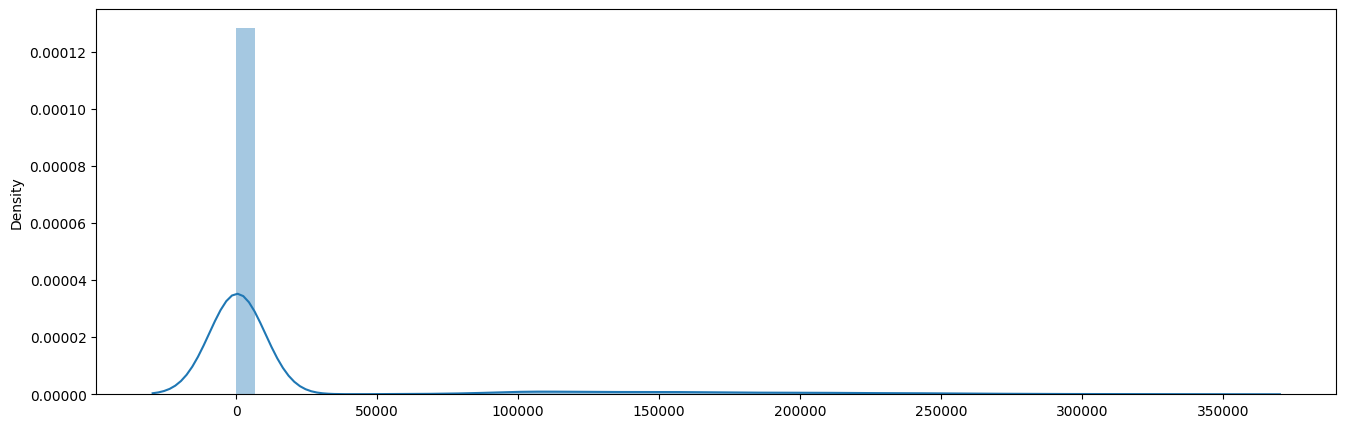

In [19]:
plt.figure(figsize=(16,5))
plt.subplot()
sns.distplot(df_iqr) #Distribution plot : How data is distributed
plt.show()

In [15]:
df_iqr

index   Price  LivingArea  Bathrooms  Bedrooms  LotSize  Age  Fireplace
0        1  134865        1676        1.5         3     0.38   14          1
1        2  118007        1694        2.0         3     0.96   15          1
2        3  138297        1800        1.0         2     0.48   49          1
3        5  206512        1456        2.0         3     0.98   10          0
4        6   50709         960        1.5         2     0.01   12          0
..     ...     ...         ...        ...       ...      ...  ...        ...
862   1040  182649        1758        2.5         3     0.27    1          1
863   1041  206480        2310        2.5         3     1.00   18          0
864   1042  107695        1802        2.0         4     0.97   56          1
865   1044  154829        1440        2.0         2     0.61   66          1
866   1045  179492        2030        2.5         3     1.00    3          1

[867 rows x 8 columns]

In [20]:
df_iqr.drop(columns="index",inplace=True)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
df_iqr

Price  LivingArea  Bathrooms  Bedrooms  LotSize  Age  Fireplace
0    134865        1676        1.5         3     0.38   14          1
1    118007        1694        2.0         3     0.96   15          1
2    138297        1800        1.0         2     0.48   49          1
3    206512        1456        2.0         3     0.98   10          0
4     50709         960        1.5         2     0.01   12          0
..      ...         ...        ...       ...      ...  ...        ...
862  182649        1758        2.5         3     0.27    1          1
863  206480        2310        2.5         3     1.00   18          0
864  107695        1802        2.0         4     0.97   56          1
865  154829        1440        2.0         2     0.61   66          1
866  179492        2030        2.5         3     1.00    3          1

[867 rows x 7 columns]

In [46]:
X=df_iqr.drop("Price",axis=1)
y=df_iqr["Price"]

In [47]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [48]:
X_test

LivingArea  Bathrooms  Bedrooms  LotSize  Age  Fireplace
361        1336        1.5         2     0.35   20          1
422        1508        1.5         3     0.34   19          0
67         1176        2.0         3     0.64    5          0
779        2039        2.5         4     0.52   18          1
394        2249        2.5         4     0.59    1          1
..          ...        ...       ...      ...  ...        ...
212        1142        1.5         3     0.19   18          0
832        2460        2.5         4     0.50    1          1
79         1876        2.5         3     0.34    1          1
148        1896        1.5         3     0.42   17          1
620        1856        1.5         3     0.60   37          1

[217 rows x 6 columns]

In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(650, 6)
(650,)
(217, 6)
(217,)


In [50]:
from sklearn.preprocessing import MinMaxScaler #applying min max scaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Decision tree

In [53]:
parameter={
    'criterion':['mse','mae'],
    'max_depth':[2,3,4,5,6,7,8,9,None],
}

In [54]:
grid=GridSearchCV(DecisionTreeRegressor(),param_grid=parameter)

In [57]:
grid.fit(X_train,y_train)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in vers

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, None]})

In [58]:
grid.best_params_

{'criterion': 'mse', 'max_depth': 4}

In [59]:
grid.best_score_

0.6440437012200037

In [61]:
reg= DecisionTreeRegressor(criterion='mse',max_depth=4)

In [62]:
reg.fit(X_train,y_train)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=4)

In [63]:
from sklearn import tree
plt.figure(figsize=(150,80))
tree.plot_tree(reg,filled=True)

[Text(0.5, 0.9, 'X[0] <= 0.439\nmse = 3486489454.918\nsamples = 650\nvalue = 162391.309'),
 Text(0.25, 0.7, 'X[0] <= 0.256\nmse = 1436057965.708\nsamples = 408\nvalue = 130535.446'),
 Text(0.125, 0.5, 'X[0] <= 0.133\nmse = 836976263.45\nsamples = 189\nvalue = 110328.931'),
 Text(0.0625, 0.3, 'X[0] <= 0.055\nmse = 621224010.559\nsamples = 64\nvalue = 94993.438'),
 Text(0.03125, 0.1, 'mse = 459397529.84\nsamples = 5\nvalue = 68510.6'),
 Text(0.09375, 0.1, 'mse = 570465548.495\nsamples = 59\nvalue = 97237.746'),
 Text(0.1875, 0.3, 'X[4] <= 0.809\nmse = 765380268.912\nsamples = 125\nvalue = 118180.704'),
 Text(0.15625, 0.1, 'mse = 558897677.203\nsamples = 118\nvalue = 115923.983'),
 Text(0.21875, 0.1, 'mse = 2713053258.245\nsamples = 7\nvalue = 156222.571'),
 Text(0.375, 0.5, 'X[4] <= 0.164\nmse = 1296601137.778\nsamples = 219\nvalue = 147973.945'),
 Text(0.3125, 0.3, 'X[3] <= 0.119\nmse = 973392891.32\nsamples = 64\nvalue = 167327.734'),
 Text(0.28125, 0.1, 'mse = 1200476363.556\nsamples 

In [64]:
y_pred=reg.predict(X_test)

array([[0.23680456, 0.2       , 0.        , 0.30973451, 0.26315789,
        1.        ],
       [0.29814551, 0.2       , 0.33333333, 0.30088496, 0.25      ,
        0.        ],
       [0.17974322, 0.4       , 0.33333333, 0.56637168, 0.06578947,
        0.        ],
       ...,
       [0.42938659, 0.6       , 0.33333333, 0.30088496, 0.01315789,
        1.        ],
       [0.43651926, 0.2       , 0.33333333, 0.37168142, 0.22368421,
        1.        ],
       [0.42225392, 0.2       , 0.33333333, 0.53097345, 0.48684211,
        1.        ]])

In [66]:
r2_score(y_test,y_pred)

0.6389861823331621

# with standard scale

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [68]:
X=df_iqr.drop("Price",axis=1)
y=df_iqr["Price"]

In [69]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [70]:
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [71]:
reg= DecisionTreeRegressor(criterion='mse',max_depth=4)

In [72]:
reg.fit(X_train,y_train)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=4)

In [73]:
y_pred=reg.predict(X_test)

In [74]:
r2_score(y_test,y_pred)

0.6389861823331621

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_pred)
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

NameError: name 'X_train' is not defined